In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")


In [4]:
data = pd.read_excel("C:/Users/shafi/Downloads/StudentsPerformance 1 (1).xlsx")

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [116]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
999,male,group E,bachelor's degree,standard,completed,100,100,100


In [103]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


# 1. Find out how many males and females participated in the test.

In [7]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

There are 518 females and 482 males participated in the test

# 2. What do you think about the students' parental level of education?

In [117]:
# visualizing the differnt parental education levels

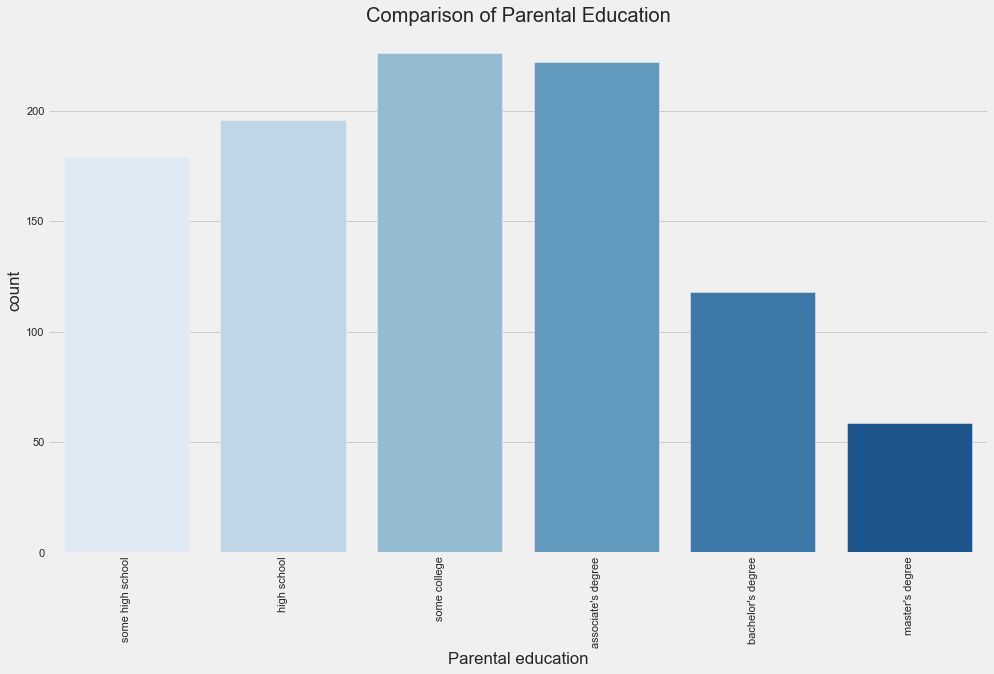

In [9]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Parental education')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

Here most number(above 200) of students's parents are some college level educated,least number(around 60) of students's parents have master's degree 

In [41]:
data_1=data.sort_values(["math score","gender"],ascending=False).head(1000)

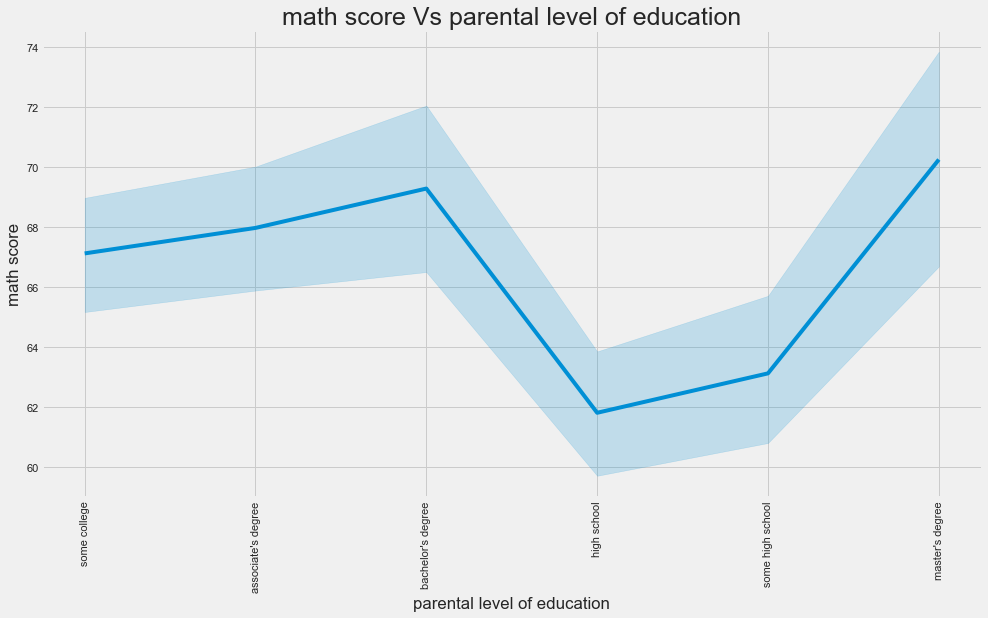

In [42]:
plt.figure(figsize = (15,8))
plt.title('math score Vs parental level of education',fontsize=25)
plt.xticks(rotation=90)
graph_1=sns.lineplot(data_1['parental level of education'],data_1['math score']);

Here math score was high for students having master's degree parents,low for having high school level parents.


In [43]:
data_3=data.sort_values(["writing score","gender"],ascending=False).head(1000)

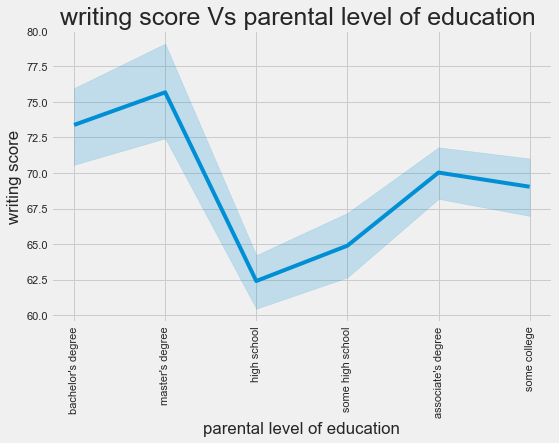

In [44]:
plt.figure(figsize = (8,5))
plt.title('writing score Vs parental level of education ',fontsize=25)
plt.xticks(rotation=90)
graph_3=sns.lineplot(data_3['parental level of education'],data_3['writing score']);

Here writing score was high for students having master's degree parents,low for having high school level parents.

In [39]:
data_2=data.sort_values(["reading score","gender"],ascending=False).head(1000)

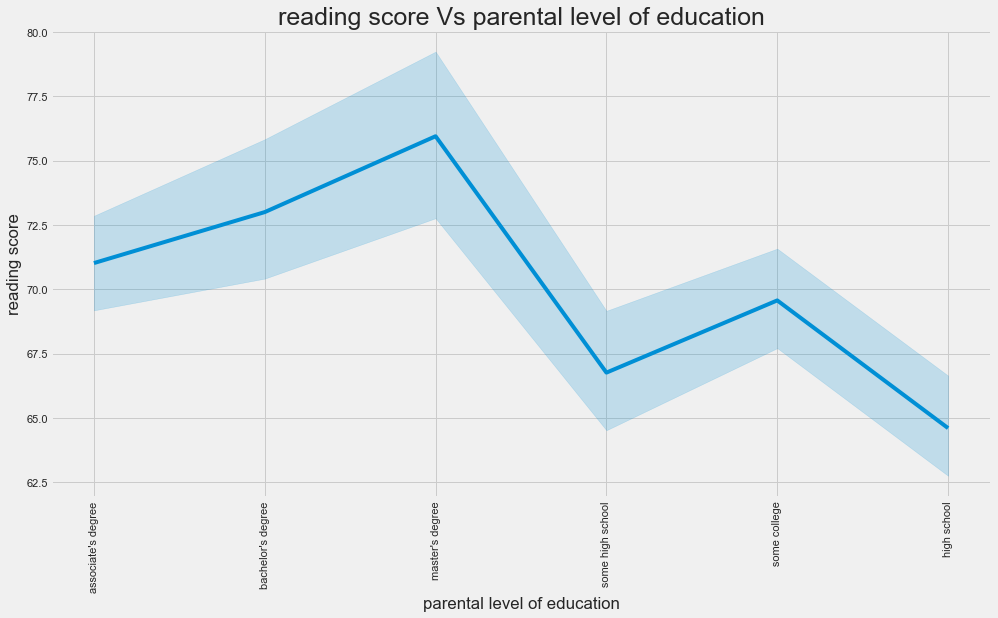

In [40]:
plt.figure(figsize = (15,8))
plt.title('reading score Vs parental level of education',fontsize=25)
plt.xticks(rotation=90)
graph_2=sns.lineplot(data_2['parental level of education'],data_2['reading score']);

Here reading score was high for students having master's degree parents,low for having high school level parents

# 3. Who scores the most on average for math, reading and writing based on

# ● Gender

In [47]:
# getting the population mean
print("Population mean for Math Scores:", data['math score'].mean())
print("Population mean for Reading Scores:", data['reading score'].mean())
print("Population mean for Writing Scores:", data['writing score'].mean())

Population mean for Math Scores: 66.001
Population mean for Reading Scores: 69.195
Population mean for Writing Scores: 68.119


In [55]:
data_avg=data[(data['gender'] == 'female') &
     (data['math score'] > 66.001) & 
     (data['writing score'] > 68.119) &
     (data['reading score'] > 69.195)]
     

In [59]:
data_avg['gender'].value_counts()

female    213
Name: gender, dtype: int64

In [65]:
data_avg1=data[(data['gender'] == 'male') &
     (data['math score'] > 66.001) & 
     (data['writing score'] > 68.119) &
     (data['reading score'] > 69.195)]

In [66]:
data_avg1['gender'].value_counts()

male    165
Name: gender, dtype: int64

Female students scores the most on average for math, reading and writing

# ● Test preparation course

In [68]:
data_avg2=data[(data['test preparation course'] == 'none') &
     (data['math score'] > 66.001) & 
     (data['writing score'] > 68.119) &
     (data['reading score'] > 69.195)]

In [69]:
data_avg2['test preparation course'].value_counts()

none    198
Name: test preparation course, dtype: int64

In [75]:
data_avg3=data[(data['test preparation course'] == 'completed') &
     (data['math score'] > 66.001) & 
     (data['writing score'] > 68.119) &
     (data['reading score'] > 69.195)]

In [76]:
data_avg3['test preparation course'].value_counts()

completed    180
Name: test preparation course, dtype: int64

Students who hadn't take the test preperation course scores the most on average for math, reading and writing.

## 4. What do you think about the scoring variation for math, reading and writing
based on

# ● Gender

In [104]:
data_variation=data.drop(['race/ethnicity','parental level of education','lunch',],axis=1)

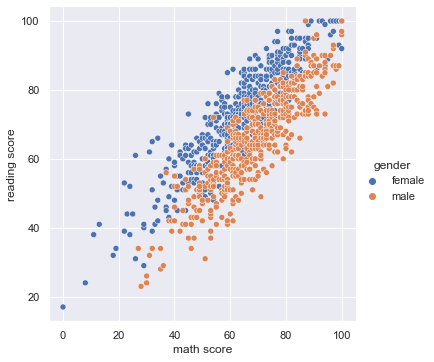

In [109]:
sns.relplot(x='math score',y='reading score',hue='gender',data=data_variation);

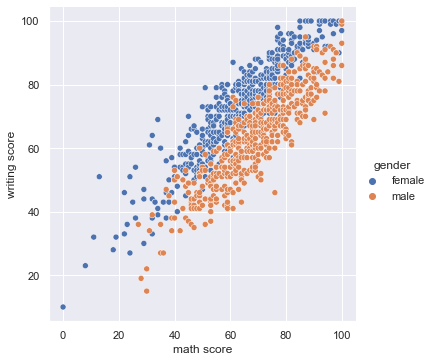

In [110]:
sns.relplot(x='math score',y='writing score',hue='gender',data=data_variation);

In [81]:
data.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

# ● Test preparation course

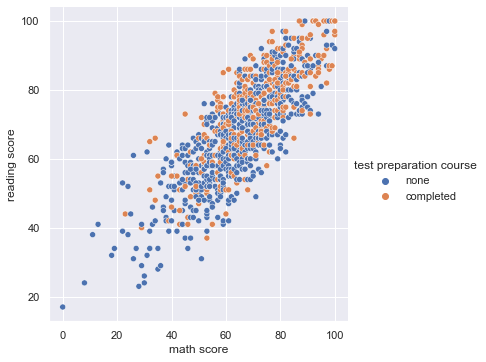

In [111]:
sns.relplot(x='math score',y='reading score',hue='test preparation course',data=data_variation);

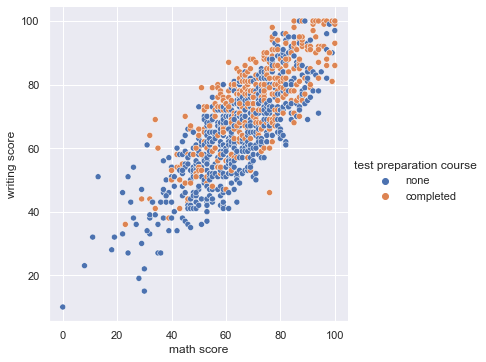

In [112]:
sns.relplot(x='math score',y='writing score',hue='test preparation course',data=data_variation);

In [113]:
data.groupby(['test preparation course']).agg(['min','median','max'])

math score             reading score              \
                               min median  max           min median  max   
test preparation course                                                    
completed                       23     70  100            37     75  100   
none                             0     64  100            17     67  100   

                        writing score              
                                  min median  max  
test preparation course                            
completed                          36     76  100  
none                               10     65  100

# 5. The management needs your help to give bonus points to the top 25% of

# students based on their maths score, so how will you help the management to achieve this

In [90]:
data_1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
999,male,group E,bachelor's degree,standard,completed,100,100,100
515,female,group E,some college,standard,none,100,92,97
...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28
51,female,group C,some high school,free/reduced,none,13,41,51
3,female,group B,some college,standard,none,11,38,32
1,female,group B,high school,free/reduced,none,8,24,23


In [114]:
#calculating the number of  25%of studens
1000*25/100

250.0

In [94]:
data_b=data_1.head(250)

In [96]:
data_bonus=data_b.drop(['race/ethnicity','parental level of education','lunch','test preparation course','reading score','writing score'],axis=1)

In [97]:
data_bonus

,gender,math score
996,male,100
997,male,100
998,male,100
999,male,100
515,female,100
...,...,...
420,female,77
421,female,77
422,female,77
423,female,77


These students will get the bonus points